In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

## data cleaning libraries

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
df.drop('tweet_id',inplace=True,axis=1)

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
df.isnull().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.drop(['negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone'],inplace=True,axis=1)

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24/02/2015 11:35
1,positive,0.3486,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24/02/2015 11:15
2,neutral,0.6837,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24/02/2015 11:15
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,24/02/2015 11:15
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,24/02/2015 11:14


In [ ]:
## Data Analysis

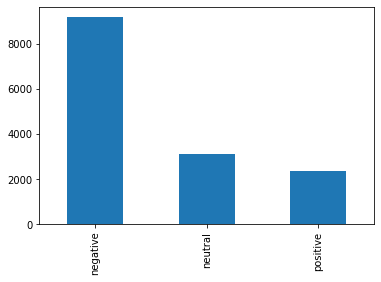

In [ ]:
df.airline_sentiment.value_counts().plot(kind='bar')

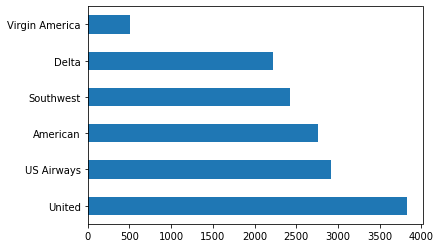

In [ ]:
df.airline.value_counts().plot(kind='barh')

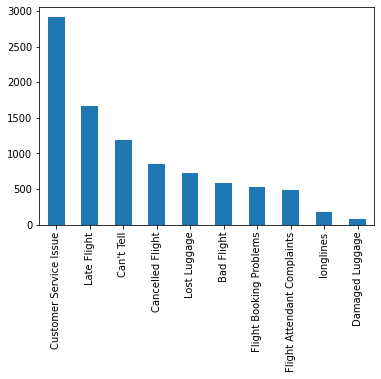

In [ ]:
df.negativereason.value_counts().plot(kind='bar')

In [ ]:
df_each_airline_sentiment = pd.crosstab(df.airline_sentiment,df.airline)

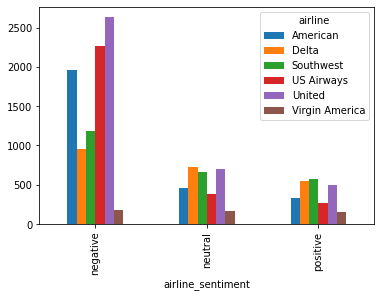

In [ ]:
df_each_airline_sentiment.plot(kind='bar')

In [ ]:
df_each_airline_negative = pd.crosstab(df.airline,df.negativereason)

In [ ]:
df_each_airline_negative.style.highlight_max(color='red',axis=1)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


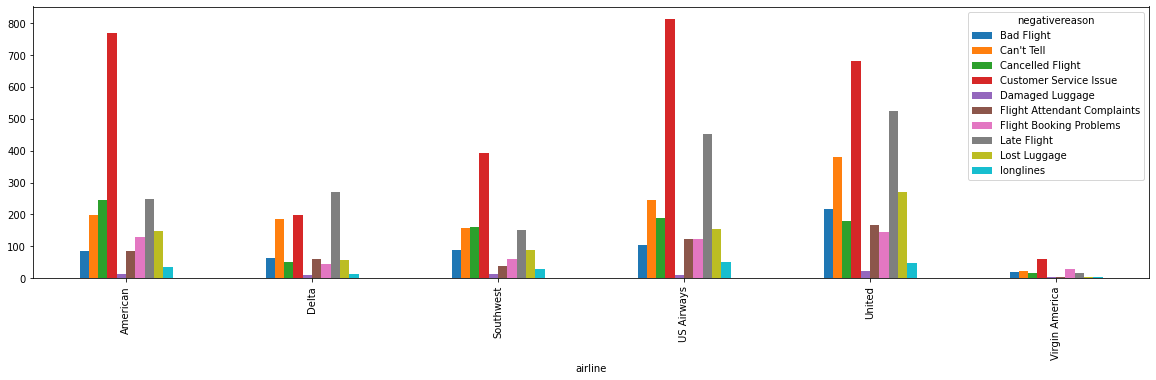

In [ ]:
df_each_airline_negative.plot(kind='bar',figsize=(20,5))

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [ ]:
df['tweet_created'].min()

datetime.date(2015, 2, 16)

In [ ]:
df['tweet_created'].max()

datetime.date(2015, 2, 24)

In [ ]:
df_negativereason__date = pd.crosstab(df.tweet_created,df.airline)

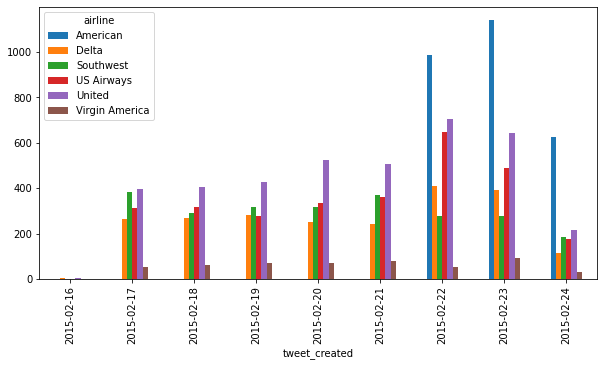

In [ ]:
df_negativereason__date.plot(kind='bar',figsize=(10,5))

In [ ]:
## Data Cleaning

In [ ]:
stops = set(stopwords.words('english'))

In [ ]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
len(stops)

179

In [ ]:
def data_clean(sentence):
  words = sentence.lower()  ## it converts all captital letters into small letters
  words = re.sub('[^a-z]',' ',words) ## re=regex function it will replace the unnecessary characters to space here, ^ means allowed
  words = words.split()  ## creating a list
  important_words = [w for w in words if w not in stops] ## filtering important words
  return(' '.join(important_words))  ## to join into a sentence

In [ ]:
ex = 'it is 9:45 but we are not tired we still want to learn deep learning and i have a office to go tomorrow and anything else needed'

In [ ]:
data_clean(ex)

'tired still want learn deep learning office go tomorrow anything else needed'

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24
1,positive,0.3486,NaN,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24
2,neutral,0.6837,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24


In [ ]:
df['clean_text'] = df.text.apply(lambda x : data_clean(x)) ## lambda function is doing cleaning func to each word

In [ ]:
df.clean_text

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637    americanair please bring american airlines bla...
14638    americanair money change flight answer phones ...
14639    americanair ppl need know many seats next flig...
Name: clean_text, Length: 14640, dtype: object

In [ ]:
result = df[['text','clean_text']]

In [ ]:
result

,text,clean_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...
14637,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...
14638,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...


In [ ]:
result['count_text'] = result['clean_text'].apply(lambda x : len((x).split()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result

,text,clean_text,count_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,6
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...,8
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,11
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,5
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,6
14636,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...,14
14637,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...,6
14638,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...,9


In [ ]:
result['airline_sentiment'] = df['airline_sentiment'] ## joining a column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result

,text,clean_text,count_text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,3,neutral
1,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,6,positive
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...,8,neutral
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,11,negative
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,5,negative
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,6,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...,14,negative
14637,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...,6,neutral
14638,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...,9,negative


In [ ]:
result['count_text'].min()

1

In [ ]:
result['count_text'].max()

23

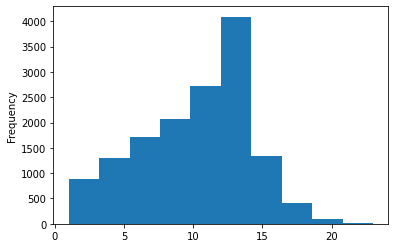

In [ ]:
result['count_text'].plot(kind='hist')

In [ ]:
result.drop(['text','count_text'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
result

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minutes late flight warnin...,negative
14637,americanair please bring american airlines bla...,neutral
14638,americanair money change flight answer phones ...,negative


In [ ]:
new_df = result

In [ ]:
new_df

,clean_text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minutes late flight warnin...,negative
14637,americanair please bring american airlines bla...,neutral
14638,americanair money change flight answer phones ...,negative


In [ ]:
new_df = pd.get_dummies(new_df['airline_sentiment'],columns=['neutral','positive','negative'])

In [ ]:
new_df

,negative,neutral,positive
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
14635,0,0,1
14636,1,0,0
14637,0,1,0
14638,1,0,0


In [ ]:
encoded_df = result.join(new_df)

In [ ]:
encoded_df

,clean_text,airline_sentiment,negative,neutral,positive
0,virginamerica dhepburn said,neutral,0,1,0
1,virginamerica plus added commercials experienc...,positive,0,0,1
2,virginamerica today must mean need take anothe...,neutral,0,1,0
3,virginamerica really aggressive blast obnoxiou...,negative,1,0,0
4,virginamerica really big bad thing,negative,1,0,0
...,...,...,...,...,...
14635,americanair thank got different flight chicago,positive,0,0,1
14636,americanair leaving minutes late flight warnin...,negative,1,0,0
14637,americanair please bring american airlines bla...,neutral,0,1,0
14638,americanair money change flight answer phones ...,negative,1,0,0


In [ ]:
encoded_df

,clean_text,airline_sentiment,negative,neutral,positive
0,virginamerica dhepburn said,neutral,0,1,0
1,virginamerica plus added commercials experienc...,positive,0,0,1
2,virginamerica today must mean need take anothe...,neutral,0,1,0
3,virginamerica really aggressive blast obnoxiou...,negative,1,0,0
4,virginamerica really big bad thing,negative,1,0,0
...,...,...,...,...,...
14635,americanair thank got different flight chicago,positive,0,0,1
14636,americanair leaving minutes late flight warnin...,negative,1,0,0
14637,americanair please bring american airlines bla...,neutral,0,1,0
14638,americanair money change flight answer phones ...,negative,1,0,0


In [ ]:
encoded_df.drop(['airline_sentiment'],inplace=True,axis=1)

In [ ]:
x = encoded_df['clean_text']
y= encoded_df.iloc[:,1:]

In [ ]:
y.head()

,negative,neutral,positive
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
## using TF-IDF Vectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
x_train_idf = tfidf.fit_transform(x_train)

In [ ]:
tfidf.get_feature_names()

['aa',
 'aaaand',
 'aaadvantage',
 'aacustomerservice',
 'aadavantage',
 'aadelay',
 'aadv',
 'aadvantage',
 'aal',
 'aaron',
 'aarp',
 'aateam',
 'aavvoreph',
 'ab',
 'aback',
 'abandon',
 'abandonment',
 'abassinet',
 'abbreve',
 'abc',
 'abcletjetbluestreamfeed',
 'abcnetwork',
 'abcnews',
 'abducted',
 'abi',
 'abigailedge',
 'abilities',
 'ability',
 'able',
 'aboard',
 'aboout',
 'abounds',
 'abprg',
 'abq',
 'abroad',
 'absolute',
 'absolutely',
 'absorb',
 'absorber',
 'absoulutely',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abtwf',
 'abundance',
 'abuse',
 'abused',
 'abxrq',
 'abysmal',
 'ac',
 'acarl',
 'acc',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessing',
 'accident',
 'accidentally',
 'accidents',
 'accomidating',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accommodation',
 'accommodations',
 'accompaniments',
 'accompany',
 'accomplish',
 'accomplished',
 'according',
 'accordingly',
 'account',

In [ ]:
len(tfidf.get_feature_names())

11888

In [ ]:
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
x_test_tfidf

<2928x11888 sparse matrix of type '<class 'numpy.float64'>'
	with 26716 stored elements in Compressed Sparse Row format>

In [ ]:
## converting sparse into dense matrix

In [ ]:
x_train = scipy.sparse.csr_matrix.todense(x_train_idf)

In [ ]:
x_train

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test = scipy.sparse.csr_matrix.todense(x_test_tfidf)

In [ ]:
len(x_train)

11712

In [ ]:
x_train.shape ## 11888 = columns --> np.of neurons at first layer, 11712 = inputs (vocab)

(11712, 11888)

In [ ]:
## Model Building

In [ ]:
neurons_first_layer = x_train.shape[0]

In [ ]:
neurons_first_layer

11712

In [ ]:
input = x_train.shape[1]

In [ ]:
input

11888

In [ ]:
output = y_train.shape[1]

In [ ]:
output

3

In [ ]:
model = Sequential([
                    Dense(neurons_first_layer,activation='relu',input_shape=(input,)), ## input -- no. of columns and all rows
                    ##Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(output,activation='softmax')
                    


])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 11712)             139243968 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                749632    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 139,993,795
Trainable params: 139,993,795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
366/366 [==============================] - 270s 734ms/step - loss: 0.6853 - accuracy: 0.7140 - val_loss: 0.5181 - val_accuracy: 0.7889
Epoch 2/5
366/366 [==============================] - 265s 723ms/step - loss: 0.2420 - accuracy: 0.9124 - val_loss: 0.6738 - val_accuracy: 0.7838
Epoch 3/5
366/366 [==============================] - 266s 726ms/step - loss: 0.0824 - accuracy: 0.9734 - val_loss: 0.8144 - val_accuracy: 0.7763
Epoch 4/5
366/366 [==============================] - 265s 723ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 1.0109 - val_accuracy: 0.7746
Epoch 5/5
366/366 [==============================] - 266s 727ms/step - loss: 0.0227 - accuracy: 0.9910 - val_loss: 1.1347 - val_accuracy: 0.7756


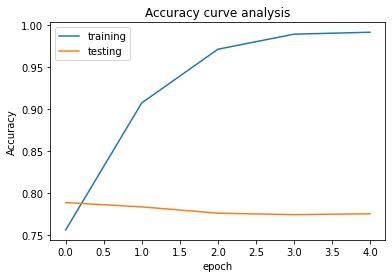

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy curve analysis')
plt.legend(['training','testing'],loc='best')

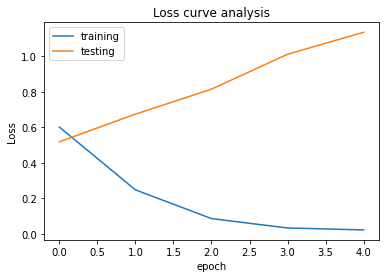

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss curve analysis')
plt.legend(['training','testing'],loc='best')

In [ ]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
366/366 [==============================] - 182s 495ms/step - loss: 0.9706 - accuracy: 0.6255 - val_loss: 0.8998 - val_accuracy: 0.6363
Epoch 2/5
366/366 [==============================] - 181s 493ms/step - loss: 0.9125 - accuracy: 0.6230 - val_loss: 0.8898 - val_accuracy: 0.6363
Epoch 3/5
366/366 [==============================] - 181s 496ms/step - loss: 0.8986 - accuracy: 0.6274 - val_loss: 0.8801 - val_accuracy: 0.6363
Epoch 4/5
366/366 [==============================] - 182s 497ms/step - loss: 0.8911 - accuracy: 0.6240 - val_loss: 0.8665 - val_accuracy: 0.6363
Epoch 5/5
366/366 [==============================] - 181s 494ms/step - loss: 0.8758 - accuracy: 0.6257 - val_loss: 0.8500 - val_accuracy: 0.6363
